# **Sabancı University CS412 Project - Spring 2023**

---

#### ***Decision Tree***

Can Ceylan, *29010*

Barış Ulaş Çukur, *29461*

Alper Kaan Odabaşoğlu, *28147*

Safa Abdullah Söğütlügil, *29214*
 
Pelinsu Saraç, *28820*

# 1- Data Extraction 

- Batches downloaded from CIFAR website are first uploaded to, then imported from the drive folder.
- Unpickle function is provided by the CIFAR website to extract the data.

In [ ]:
# load data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes') 
    return dict

- Setting random seed

In [ ]:
import numpy as np
import random
np.random.seed(42)
random.seed(42)

- Data batches in the drive folder are unpickled and stored in a list in order.
- Features and labels are extracted from the data batches to form the training set.
- Finally, same process is repeated for test batch, to form test set.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Load data batches
file_paths = [
    '/content/drive/My Drive/CS412-Project/data_batch_1',
    '/content/drive/My Drive/CS412-Project/data_batch_2',
    '/content/drive/My Drive/CS412-Project/data_batch_3',
    '/content/drive/My Drive/CS412-Project/data_batch_4',
    '/content/drive/My Drive/CS412-Project/data_batch_5'
]

batches = []
for file_path in file_paths:
    batch = unpickle(file_path)
    batches.append(batch)

# Combine batches into X (features) and y (labels)
X_train = []
y_train = []
for batch in batches:

    X_train.extend(batch[b'data']) # Unpickle function has bytes encoding, thus the b
    y_train.extend(batch[b'labels'])

# Load test batch
test_file = r'/content/drive/My Drive/CS412-Project/test_batch'
test_data = unpickle(test_file)
X_test = test_data[b'data']
y_test = test_data[b'labels']


# 2- Data Check

- In this part, the training data's content and shape are checked

In [ ]:
for i in range(5):
  print(X_train[i])
  print(len(X_train[i]))

[ 59  43  50 ... 140  84  72]
3072
[154 126 105 ... 139 142 144]
3072
[255 253 253 ...  83  83  84]
3072
[28 37 38 ... 28 37 46]
3072
[170 168 177 ...  82  78  80]
3072


- Check to see whether the classes are balanced withing whole train set.

In [ ]:
# See whether classes in training set are balanced or not

print("Count of category 0:", y_train.count(0))
print("Count of category 1:", y_train.count(1))
print("Count of category 2:", y_train.count(2))
print("Count of category 3:", y_train.count(3))
print("Count of category 4:", y_train.count(4))
print("Count of category 5:", y_train.count(5))
print("Count of category 6:", y_train.count(6))
print("Count of category 7:", y_train.count(7))
print("Count of category 8:", y_train.count(8))
print("Count of category 9:", y_train.count(9))

Count of category 0: 5000
Count of category 1: 5000
Count of category 2: 5000
Count of category 3: 5000
Count of category 4: 5000
Count of category 5: 5000
Count of category 6: 5000
Count of category 7: 5000
Count of category 8: 5000
Count of category 9: 5000


> It can be seen that over all batches, classes are distributed equally.

- Check to see whether the classes are balanced within a single batch.

In [ ]:
# See whether classes in within a single batch are balanced or not

testing = r'/content/drive/My Drive/CS412-Project/data_batch_5'
testingData = unpickle(testing)
y = test_data[b'labels']

print("Count of category 0:", y.count(0))
print("Count of category 1:", y.count(1))
print("Count of category 2:", y.count(2))
print("Count of category 3:", y.count(3))
print("Count of category 4:", y.count(4))
print("Count of category 5:", y.count(5))
print("Count of category 6:", y.count(6))
print("Count of category 7:", y.count(7))
print("Count of category 8:", y.count(8))
print("Count of category 9:", y.count(9))

Count of category 0: 1000
Count of category 1: 1000
Count of category 2: 1000
Count of category 3: 1000
Count of category 4: 1000
Count of category 5: 1000
Count of category 6: 1000
Count of category 7: 1000
Count of category 8: 1000
Count of category 9: 1000


> It seems to be that, classes within a batch are also equally distributed.

# 3- Initial Testing

- In this part, we fit a decision tree classifier and measure its accuracy and depth.
- This is done to get some idea about what can be used at fine-tuning and what to expect.

In [ ]:
# Create an instance of the DecisionTreeClassifier
classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate the classifier on the test set

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print('Accuracy without fine-tuning:', acc)

Accuracy without fine-tuning: 0.2694


> Initial testing suggests that the accuracies will possibly be lower than expected.

In [ ]:
# To decide which values to try for max_depth hyperparameter, see depth of tree without fine-tuning 

print('Depth of the decision tree without fine-tuning:', classifier.get_depth())

Depth of the decision tree without fine-tuning: 44


> Since deeper trees are know to be more prone to overfit, maximum depth can be less than 44.

# 4- Fine Tuning

- Here we perform fine-tuning to improve the model's performance.
- We have chosen **criterion** and **max_depth** parameters to tune.
- "Gini" and "Entropy" are chosen for criterion; 10, 20 and 30 are chosen for max_depth. max_depth is also left to free.
- To make the trial process simpler, GridSearchCV object of Sklearn library is utilized. 
- GridSearchCV object uses cross-validation to do the fine-tuning. Here, it is 5-fold, for 5 batches. 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30], 
}

# Create an instance of the DecisionTreeClassifier
val_classifier = DecisionTreeClassifier()

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(val_classifier, param_grid, cv=5) 
grid_search.fit(X_train, y_train) 

# Retrieve the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10}
Best Score: 0.29507999999999995


> Best result shows that the accuracy is indeed lower than expected. Technically, it performs better than random - 1/10 for this case - however, at least 80% accuracy is expected in general.

- Exact results can be seen in the grid searcg results below. However, it is hard to read.

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([196.64519925, 105.36353521, 175.5857615 , 183.93524113,
        293.14008822, 167.41608839, 294.60569186, 296.51282873]),
 'std_fit_time': array([6.34789126, 0.65931276, 1.05118085, 1.17223214, 1.7338704 ,
        1.28506517, 4.33770316, 4.29792081]),
 'mean_score_time': array([0.04733162, 0.04635668, 0.05061617, 0.04777942, 0.04706969,
        0.04926243, 0.0546001 , 0.05966372]),
 'std_score_time': array([0.00029292, 0.00656923, 0.00686453, 0.00087253, 0.00070176,
        0.00737694, 0.00781057, 0.00859531]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy', 'entropy'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[None, 10, 20, 30, None, 10, 20, 30],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dty

- Here, the results are converted into a dataframe to list the results in a better way.

In [ ]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)

result_columns = ['param_criterion', 'param_max_depth', 'mean_fit_time', 'mean_score_time', 'mean_test_score', 'std_test_score', 'rank_test_score']

cv_results = cv_results[result_columns]

cv_results.sort_values('rank_test_score', inplace=True)

cv_results.reset_index(drop=True, inplace=True)

print(cv_results)

  param_criterion param_max_depth  mean_fit_time  mean_score_time  \
0            gini              10     105.363535         0.046357   
1         entropy              10     167.416088         0.049262   
2            gini              20     175.585761         0.050616   
3            gini              30     183.935241         0.047779   
4            gini            None     196.645199         0.047332   
5         entropy            None     293.140088         0.047070   
6         entropy              20     294.605692         0.054600   
7         entropy              30     296.512829         0.059664   

   mean_test_score  std_test_score  rank_test_score  
0          0.29508        0.001920                1  
1          0.28794        0.003397                2  
2          0.26638        0.006563                3  
3          0.26080        0.006511                4  
4          0.25996        0.005537                5  
5          0.25972        0.004744                6  


- Here is the plot of results for better understanding.

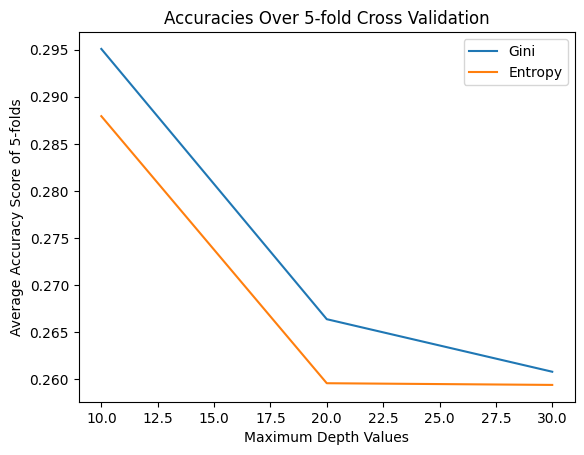

In [ ]:
import matplotlib.pyplot as plt

# Mean Test Scores According to criterion
gini_means = [0.29508, 0.26638, 0.26080, 0.25996]
entropy_means = [0.28794, 0.25958, 0.25940, 0.25972]

# X-axis as max_depth values
max_depth_trials = [10, 20, 30, None]

# Plotting the validation accuracies
fig, ax = plt.subplots()
ax.plot(max_depth_trials, gini_means, label='Gini')
ax.plot(max_depth_trials, entropy_means, label='Entropy')

ax.set_xlabel('Maximum Depth Values')
ax.set_ylabel('Average Accuracy Score of 5-folds')
ax.set_title('Accuracies Over 5-fold Cross Validation')
ax.legend()

# Show the plot
plt.show()

# 5- Final Model and Test

- Finally, we fit the final_classifier using the results of the fine-tuning.
- In other words, we train a Decision Tree that uses **gini index as criterion** and has **maximum depth of 10.**

In [ ]:
# Create an instance of the DecisionTreeClassifier
final_classifier = DecisionTreeClassifier(criterion='gini', max_depth=10)

# Fit the classifier to the training data
final_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

- Here, the test set is used to test the final model.

In [ ]:
y_pred_final = final_classifier.predict(X_test)
final_acc = accuracy_score(y_true=y_test, y_pred=y_pred_final)
print('Accuracy with fine-tuning; hyperparameters: criterion = gini, maximum depth = 10:', final_acc)

Accuracy with fine-tuning; hyperparameters: criterion = gini, maximum depth = 10: 0.3061


> The model did improve after hyperparamater tuning, even if it is a slight improvement. Accuracy score increased from around 27% to 30% by using 'gini' as the criterion and 10 as the maximum depth. Again, accuracy is still lower than expected.

## *Final remark of this section is, the decison tree classifier seems to be not a very suitable option for the image classification task.*